# Denmark Office

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df_1h = pd.read_csv('D:/payday/train_public/1h/L03.B02_1H.csv')
df_weather = pd.read_csv('D:/payday/train_public/weather/L03_weather_train.csv')

In [3]:
df_1h.describe()

,main_meter(kW)
count,8282.000000
mean,76.356201
std,39.759828
min,0.294118
25%,47.286330
50%,70.556538
75%,98.714081
max,284.500000


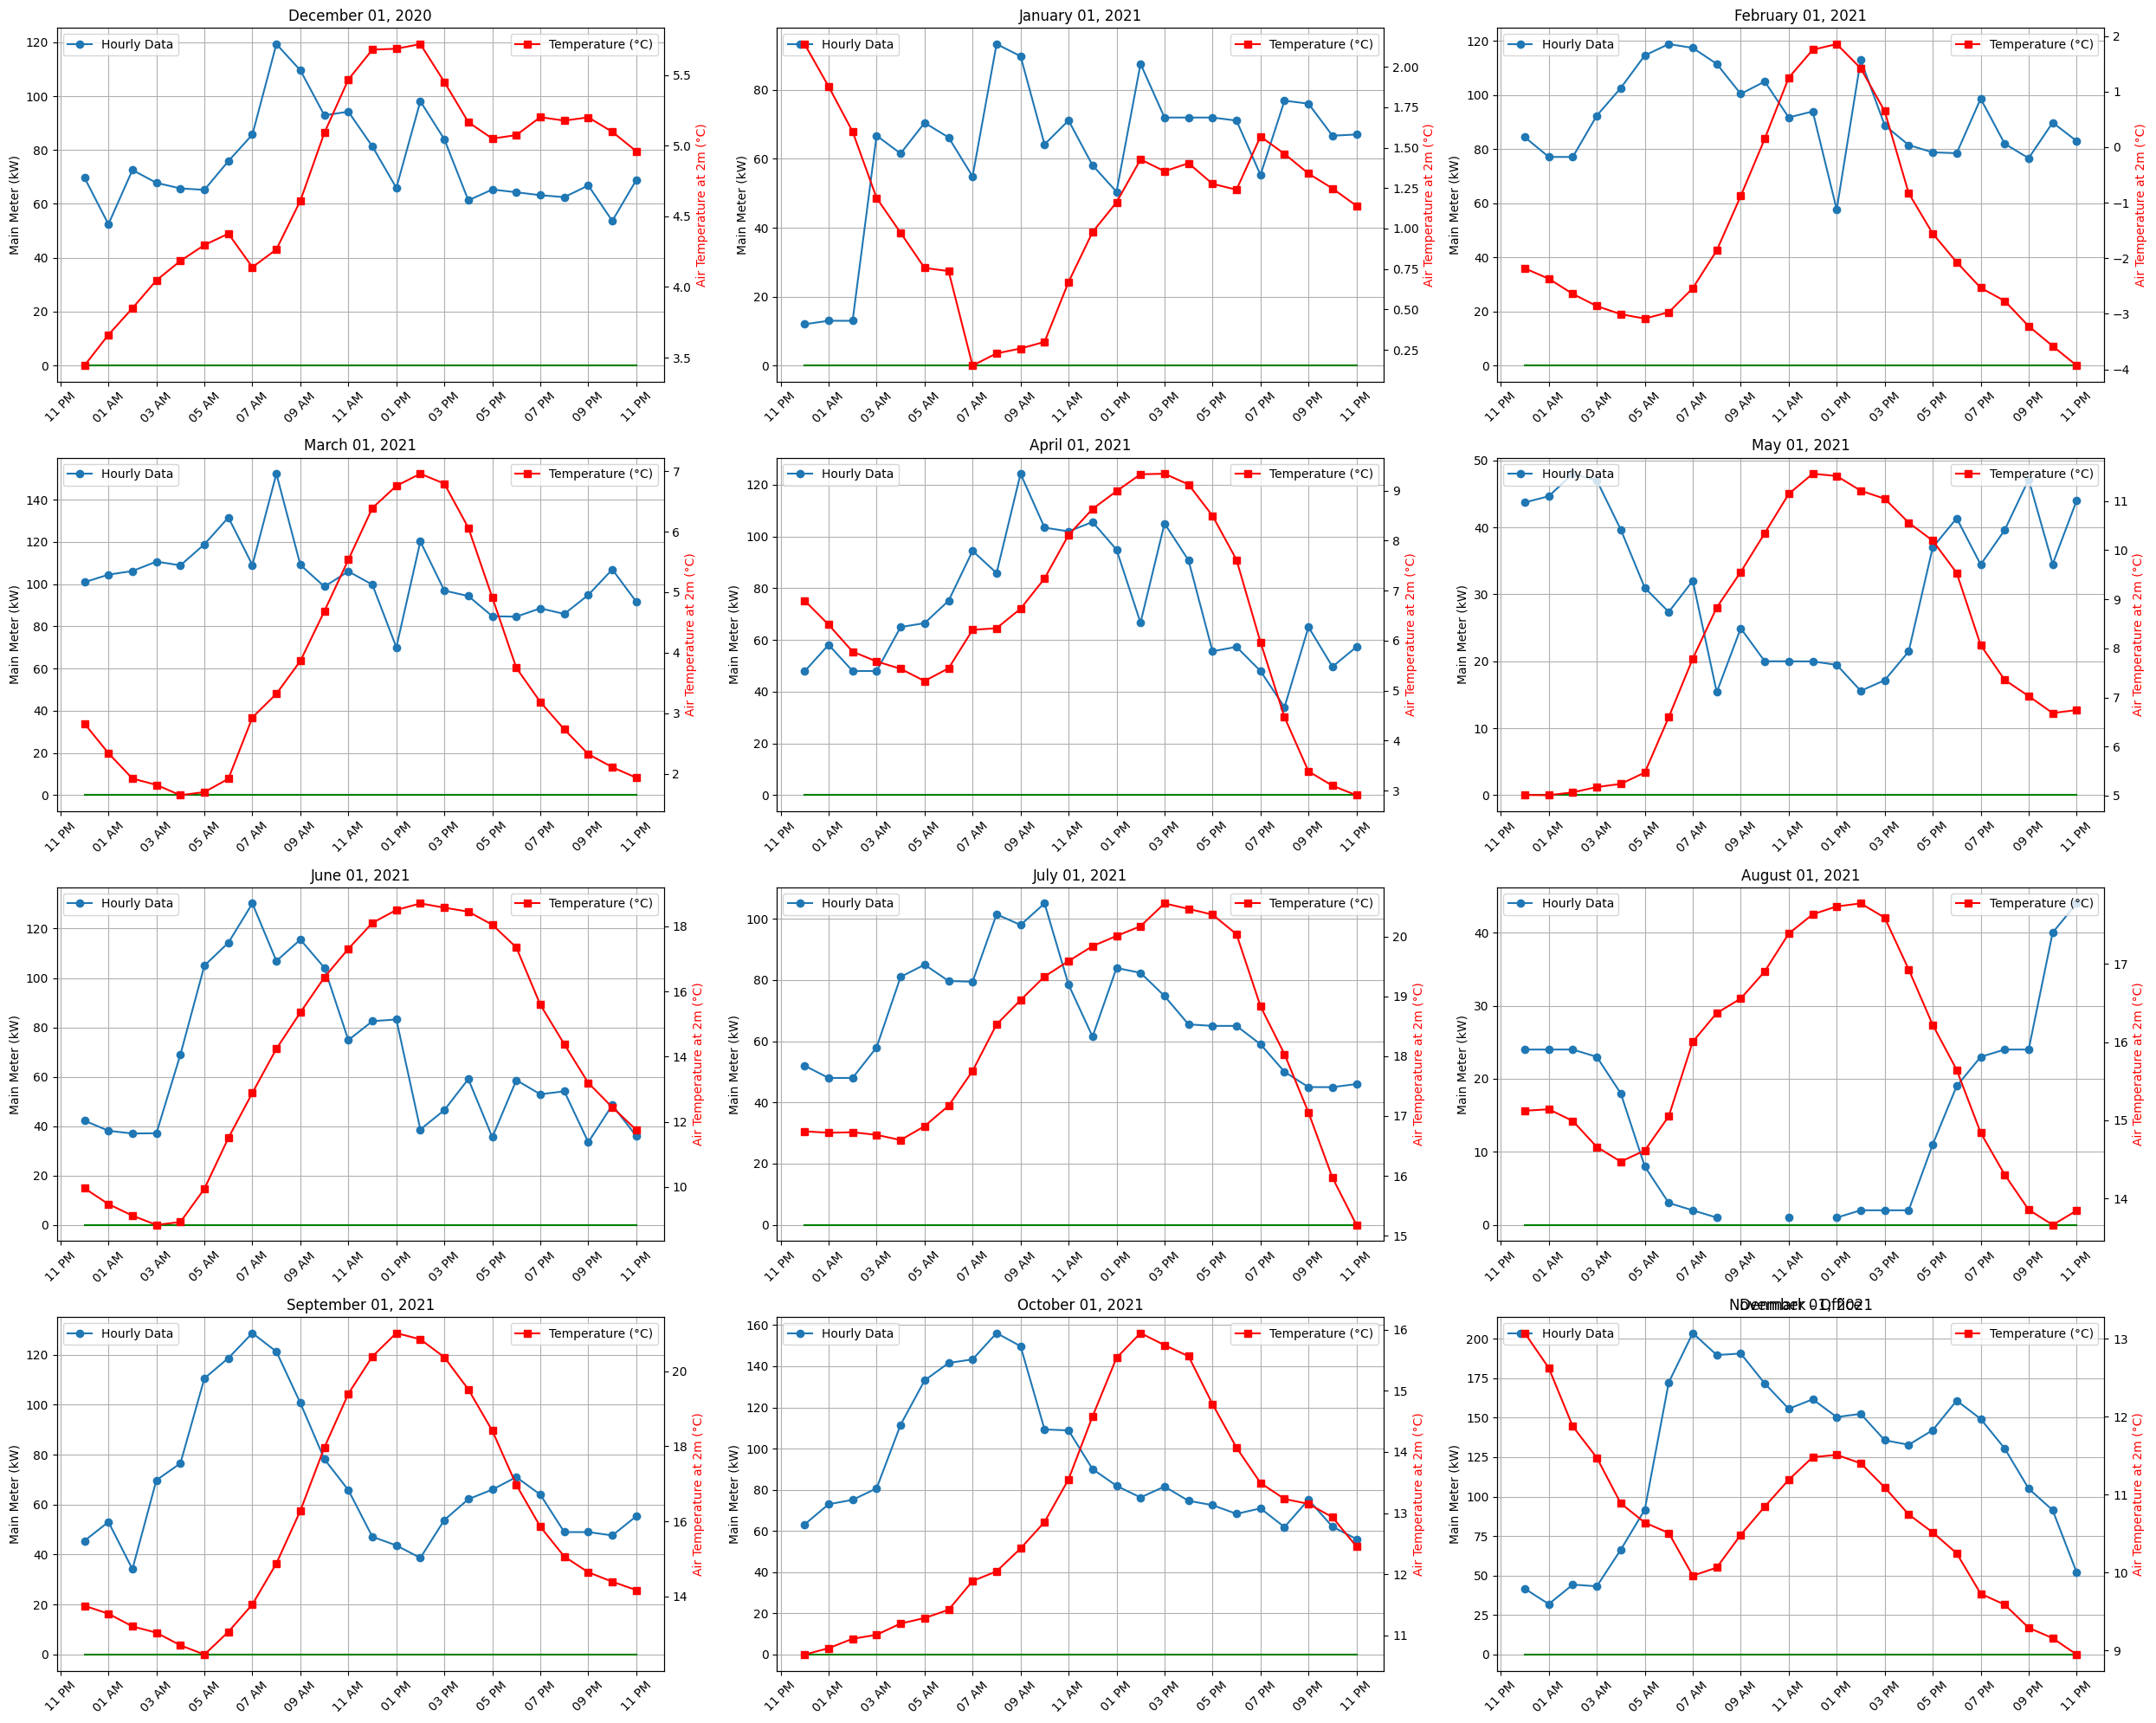

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming df_1h, df_bo1min15, and df_weather are your DataFrames and already loaded

# Convert the 'timestamp' column to datetime for all DataFrames
df_1h['timestamp'] = pd.to_datetime(df_1h['timestamp'])

df_weather['timestamp'] = pd.to_datetime(df_weather['timestamp'])

# Create a list of dates for the first day of each month in 2021
dates = pd.date_range(start='2020-12-01', end='2021-11-01', freq='MS').date

# Create a 3x4 grid of subplots
fig, axes = plt.subplots(4, 3, figsize=(25, 20), sharex=False, sharey=False)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each date and create the plot
for i, date in enumerate(dates):
    one_day_hourly = df_1h[df_1h['timestamp'].dt.date == pd.to_datetime(date).date()]
    one_day_weather = df_weather[df_weather['timestamp'].dt.date == pd.to_datetime(date).date()]

    # Plot hourly data
    axes[i].plot(one_day_hourly['timestamp'],[0]*len(one_day_hourly['main_meter(kW)']),color = 'green')
    axes[i].plot(one_day_hourly['timestamp'], one_day_hourly['main_meter(kW)'], marker='o', label='Hourly Data')
    
    axes[i].set_ylabel('Main Meter (kW)')
    axes[i].set_title(f'{date.strftime("%B %d, %Y")}')
    axes[i].grid(True)
    axes[i].legend(loc='upper left')

    # Plot weather data
    ax2 = axes[i].twinx()
    ax2.plot(one_day_weather['timestamp'], one_day_weather['air_temperature_at_2m(deg_C)'], marker='s', color='red', label='Temperature (°C)')
    ax2.set_ylabel('Air Temperature at 2m (°C)', color='red')
    ax2.legend(loc='upper right')

    # Limit x-ticks to avoid max ticks error
    ax2.xaxis.set_major_locator(mdates.HourLocator(interval=2))  # Set interval to 2 hours
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%I %p'))

# Rotate x-axis labels for the last subplot
for ax in axes:

    ax.tick_params(axis='x', rotation=45)

fig.tight_layout()
plt.title('Denmark - Office')
plt.show()

If the location is an office/School/Kindergarten, these usually remain close on Sundays, so for these dates, the consuption should be fairly low, and the normal day curve of low in mornings and evenings is visible with the contrast of sunny afternoons. Nordic countries usually have a weather on the lower side, which can be poised to induce the need for the heating service, thus having the main meter reading go up.

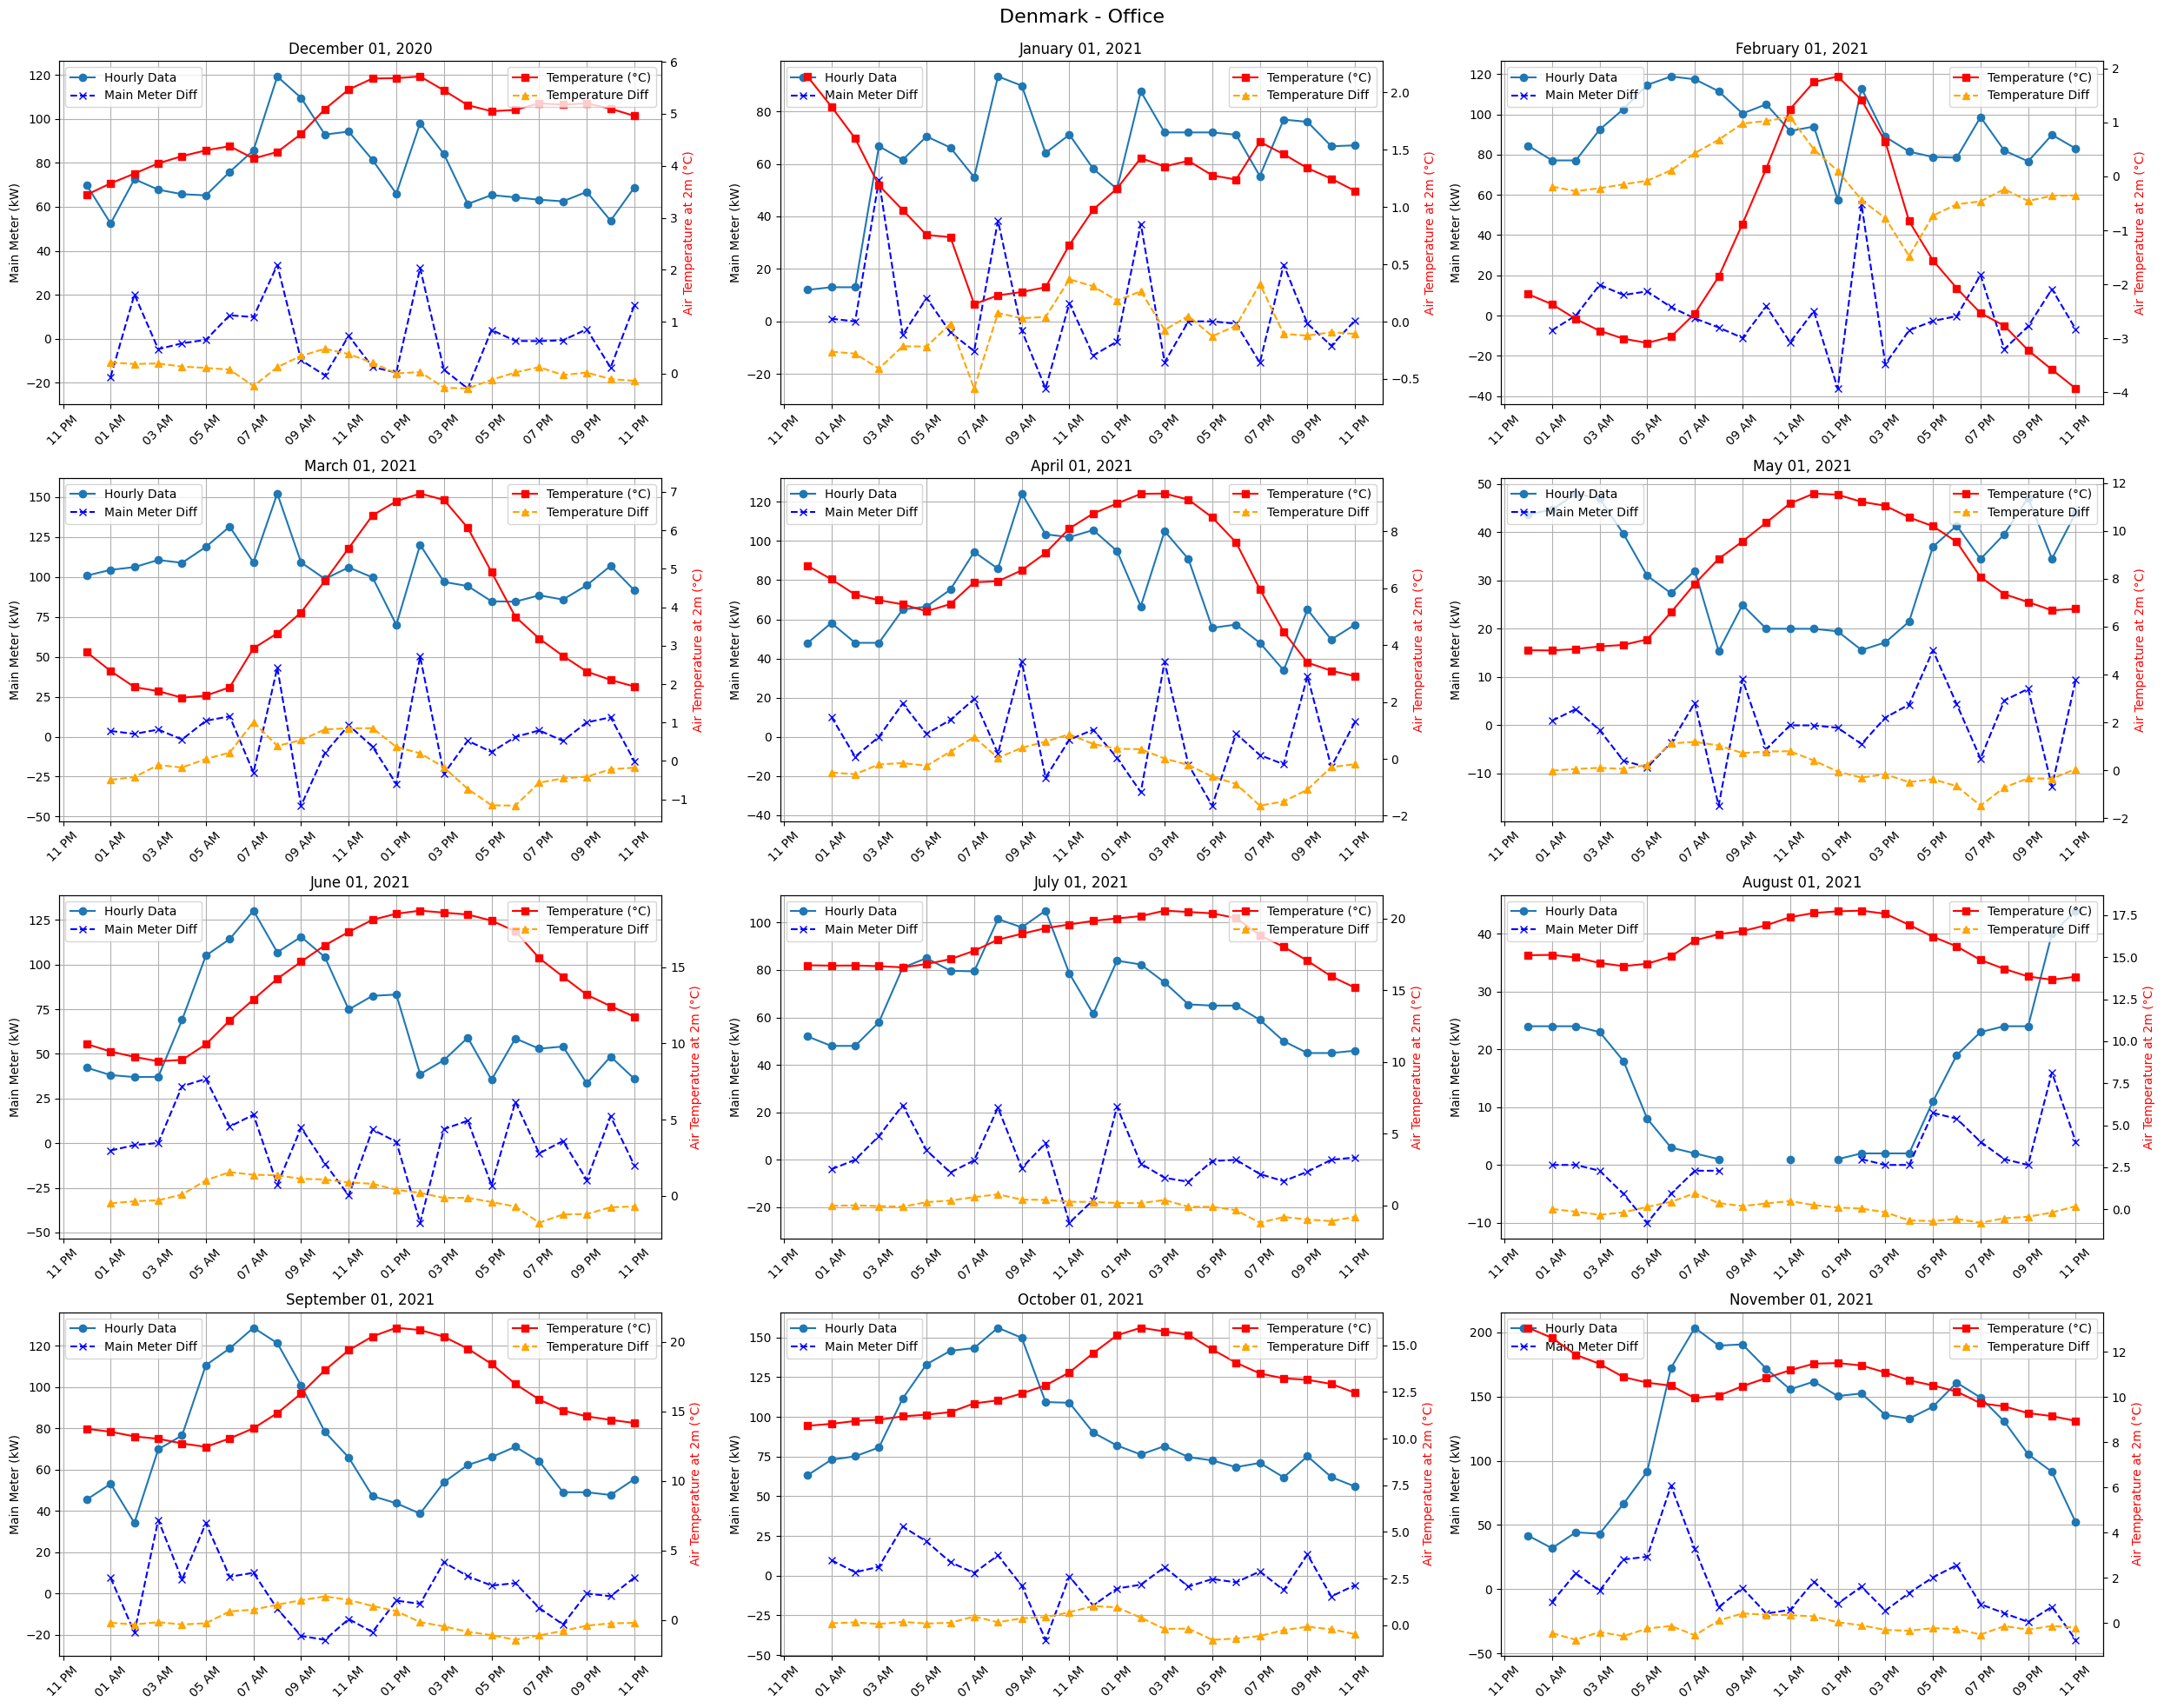

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming df_1h and df_weather are your DataFrames and already loaded

# Convert the 'timestamp' column to datetime for all DataFrames
df_1h['timestamp'] = pd.to_datetime(df_1h['timestamp'])
df_weather['timestamp'] = pd.to_datetime(df_weather['timestamp'])

# Create a list of dates for the first day of each month in 2021
dates = pd.date_range(start='2020-12-01', end='2021-11-01', freq='MS').date

# Create a 3x4 grid of subplots
fig, axes = plt.subplots(4, 3, figsize=(25, 20), sharex=False, sharey=False)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each date and create the plot
for i, date in enumerate(dates):
    one_day_hourly = df_1h[df_1h['timestamp'].dt.date == pd.to_datetime(date).date()]
    one_day_weather = df_weather[df_weather['timestamp'].dt.date == pd.to_datetime(date).date()]

    # Calculate the derivative for main_meter(kW) data
    main_meter_diff = one_day_hourly['main_meter(kW)'].diff() / (one_day_hourly['timestamp'].diff().dt.total_seconds() / 3600)

    # Plot hourly data
    axes[i].plot(one_day_hourly['timestamp'], one_day_hourly['main_meter(kW)'], marker='o', label='Hourly Data')
    axes[i].plot(one_day_hourly['timestamp'], main_meter_diff, marker='x', linestyle='--', color='blue', label='Main Meter Diff')

    axes[i].set_ylabel('Main Meter (kW)')
    axes[i].set_title(f'{date.strftime("%B %d, %Y")}')
    axes[i].grid(True)
    axes[i].legend(loc='upper left')

    # Plot weather data
    ax2 = axes[i].twinx()
    air_temp_diff = one_day_weather['air_temperature_at_2m(deg_C)'].diff() / (one_day_weather['timestamp'].diff().dt.total_seconds() / 3600)
    ax2.plot(one_day_weather['timestamp'], one_day_weather['air_temperature_at_2m(deg_C)'], marker='s', color='red', label='Temperature (°C)')
    ax2.plot(one_day_weather['timestamp'], air_temp_diff, marker='^', linestyle='--', color='orange', label='Temperature Diff')
    ax2.set_ylabel('Air Temperature at 2m (°C)', color='red')
    ax2.legend(loc='upper right')

    # Limit x-ticks to avoid max ticks error
    ax2.xaxis.set_major_locator(mdates.HourLocator(interval=2))  # Set interval to 2 hours
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%I %p'))

# Rotate x-axis labels for the last subplot
for ax in axes:
    ax.tick_params(axis='x', rotation=45)

fig.tight_layout()
fig.suptitle('Denmark - Office', fontsize=16)
plt.subplots_adjust(top=0.95)
plt.show()
